In [515]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns
from scipy import stats

# New York

In [516]:
ny_sites = {"Pre Emption":"Y1", 
            "Abbott":"Y2",
            "Emmi":"Y3",
            "G&S Orchards":"Y4",
            "Berry Patch":"Y5"}

In [517]:
swd_ny = pd.read_csv('Data/swd_ny.csv')
swd_ny = clean_columns(swd_ny)
swd_ny["collection_date"] = pd.to_datetime(swd_ny["collection_date"], format='mixed')

swd_ny

,site,collection_date,fruit,sample_type,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,sum_male_swd,sum_male_lj,sum_fem_lj,sum_male_gk,sum_fem_gk,sum_other,notes
0,Emmi,2024-09-04,Autum Olive,Fruit Collection,43.173433,-76.401175,100.0,1,27.7,0.0,1.0,0,0,0,0,0,NaN
1,Abbott,2024-06-26,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,222.1,0.0,0.0,0,0,0,0,0,NaN
2,Abbott,2024-07-25,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,268.0,81.0,73.0,0,0,0,0,0,NaN
3,Emmi,2024-06-26,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,214.0,0.0,0.0,0,0,0,0,2,NaN
4,Emmi,2024-07-25,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,175.5,67.0,60.0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Pre Emption,2022-09-20,Sentinel,Sentinel,42.793386,-77.133892,NaN,6,NaN,64.0,37.0,2,4,0,0,1,NaN
57,Abbott,2022-09-20,Sentinel,Sentinel,43.134334,-76.280247,NaN,6,NaN,27.0,24.0,2,7,0,0,0,NaN
58,Emmi,2022-09-20,Sentinel,Sentinel,43.173433,-76.401175,NaN,6,NaN,32.0,19.0,8,5,0,0,0,NaN
59,G&S Orchards,2022-09-20,Sentinel,Sentinel,43.168194,-77.331758,NaN,6,NaN,13.0,5.0,6,26,0,0,0,NaN


In [518]:
swd_ny['site_code'] = swd_ny['site'].map(ny_sites).fillna('')
swd_ny

,site,collection_date,fruit,sample_type,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,sum_male_swd,sum_male_lj,sum_fem_lj,sum_male_gk,sum_fem_gk,sum_other,notes,site_code
0,Emmi,2024-09-04,Autum Olive,Fruit Collection,43.173433,-76.401175,100.0,1,27.7,0.0,1.0,0,0,0,0,0,NaN,Y3
1,Abbott,2024-06-26,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,222.1,0.0,0.0,0,0,0,0,0,NaN,Y2
2,Abbott,2024-07-25,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,268.0,81.0,73.0,0,0,0,0,0,NaN,Y2
3,Emmi,2024-06-26,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,214.0,0.0,0.0,0,0,0,0,2,NaN,Y3
4,Emmi,2024-07-25,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,175.5,67.0,60.0,0,0,0,0,0,NaN,Y3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Pre Emption,2022-09-20,Sentinel,Sentinel,42.793386,-77.133892,NaN,6,NaN,64.0,37.0,2,4,0,0,1,NaN,Y1
57,Abbott,2022-09-20,Sentinel,Sentinel,43.134334,-76.280247,NaN,6,NaN,27.0,24.0,2,7,0,0,0,NaN,Y2
58,Emmi,2022-09-20,Sentinel,Sentinel,43.173433,-76.401175,NaN,6,NaN,32.0,19.0,8,5,0,0,0,NaN,Y3
59,G&S Orchards,2022-09-20,Sentinel,Sentinel,43.168194,-77.331758,NaN,6,NaN,13.0,5.0,6,26,0,0,0,NaN,Y4


In [519]:
cdl_ny = pd.read_csv('Landscape/CDL/2023_ny_cdl_1500m.csv')
cdl_ny = clean_columns(cdl_ny)
cdl_ny

,unnamed_0,name,corn,sorghum,soybeans,sunflower,sweet_corn,barley,spring_wheat,winter_wheat,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,0,Y1,4585,0,2239,0,2,0,0,3311,...,0.089761,585,0.040362,634,0.043742,0,0.000000,0.077342,0.130123,1500
1,1,Y2,2710,1,224,2,26,3,1,88,...,0.276307,2852,0.194623,3619,0.246963,710,0.048451,0.127610,0.470929,1500
2,2,Y3,562,115,1596,14,127,11,8,262,...,0.334992,2131,0.145243,1910,0.130180,2152,0.146674,0.242026,0.480234,1500
3,3,Y4,1019,0,954,0,6,0,0,287,...,0.411424,3771,0.257038,2368,0.161407,29,0.001977,0.208984,0.668462,1500
4,4,Y5,550,0,25,0,17,0,0,31,...,0.701830,1878,0.130680,1010,0.070280,14,0.000974,0.641291,0.832510,1500


In [520]:
swd_ny = pd.merge(swd_ny, cdl_ny, how='left', left_on='site_code', right_on='name')
swd_ny

,site,collection_date,fruit,sample_type,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,Emmi,2024-09-04,Autum Olive,Fruit Collection,43.173433,-76.401175,100.0,1,27.7,0.0,...,0.334992,2131,0.145243,1910,0.130180,2152,0.146674,0.242026,0.480234,1500
1,Abbott,2024-06-26,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,222.1,0.0,...,0.276307,2852,0.194623,3619,0.246963,710,0.048451,0.127610,0.470929,1500
2,Abbott,2024-07-25,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,268.0,81.0,...,0.276307,2852,0.194623,3619,0.246963,710,0.048451,0.127610,0.470929,1500
3,Emmi,2024-06-26,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,214.0,0.0,...,0.334992,2131,0.145243,1910,0.130180,2152,0.146674,0.242026,0.480234,1500
4,Emmi,2024-07-25,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,175.5,67.0,...,0.334992,2131,0.145243,1910,0.130180,2152,0.146674,0.242026,0.480234,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Pre Emption,2022-09-20,Sentinel,Sentinel,42.793386,-77.133892,NaN,6,NaN,64.0,...,0.089761,585,0.040362,634,0.043742,0,0.000000,0.077342,0.130123,1500
57,Abbott,2022-09-20,Sentinel,Sentinel,43.134334,-76.280247,NaN,6,NaN,27.0,...,0.276307,2852,0.194623,3619,0.246963,710,0.048451,0.127610,0.470929,1500
58,Emmi,2022-09-20,Sentinel,Sentinel,43.173433,-76.401175,NaN,6,NaN,32.0,...,0.334992,2131,0.145243,1910,0.130180,2152,0.146674,0.242026,0.480234,1500
59,G&S Orchards,2022-09-20,Sentinel,Sentinel,43.168194,-77.331758,NaN,6,NaN,13.0,...,0.411424,3771,0.257038,2368,0.161407,29,0.001977,0.208984,0.668462,1500


In [521]:
swd_ny['swd_sum'] = swd_ny['sum_fem_swd'] + swd_ny['sum_male_swd']
swd_ny['lj_sum'] = swd_ny['sum_fem_lj'] + swd_ny['sum_male_lj']
swd_ny['gk_sum'] = swd_ny['sum_fem_gk'] + swd_ny['sum_male_gk']
swd_ny = swd_ny.dropna(subset = ['swd_sum', 'lj_sum', 'gk_sum'])
swd_ny

,site,collection_date,fruit,sample_type,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,...,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,Emmi,2024-09-04,Autum Olive,Fruit Collection,43.173433,-76.401175,100.0,1,27.7,0.0,...,1910,0.130180,2152,0.146674,0.242026,0.480234,1500,1.0,0,0
1,Abbott,2024-06-26,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,222.1,0.0,...,3619,0.246963,710,0.048451,0.127610,0.470929,1500,0.0,0,0
2,Abbott,2024-07-25,Blueberry,Fruit Collection,43.134334,-76.280247,125.0,5,268.0,81.0,...,3619,0.246963,710,0.048451,0.127610,0.470929,1500,154.0,0,0
3,Emmi,2024-06-26,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,214.0,0.0,...,1910,0.130180,2152,0.146674,0.242026,0.480234,1500,0.0,0,0
4,Emmi,2024-07-25,Blueberry,Fruit Collection,43.173433,-76.401175,125.0,5,175.5,67.0,...,1910,0.130180,2152,0.146674,0.242026,0.480234,1500,127.0,0,0
5,G&S Orchards,2024-06-26,Blueberry,Fruit Collection,43.168194,-77.331758,125.0,5,296.0,0.0,...,2368,0.161407,29,0.001977,0.208984,0.668462,1500,0.0,0,0
6,G&S Orchards,2024-07-25,Blueberry,Fruit Collection,43.168194,-77.331758,125.0,5,325.7,0.0,...,2368,0.161407,29,0.001977,0.208984,0.668462,1500,0.0,0,0
7,Pre Emption,2024-06-26,Blueberry,Fruit Collection,42.793386,-77.133892,125.0,5,204.4,0.0,...,634,0.043742,0,0.000000,0.077342,0.130123,1500,3.0,0,0
8,Pre Emption,2024-07-25,Blueberry,Fruit Collection,42.793386,-77.133892,125.0,5,157.6,396.0,...,634,0.043742,0,0.000000,0.077342,0.130123,1500,744.0,1,0
9,Abbott,2024-09-04,Buckthorn,Fruit Collection,43.134334,-76.280247,500.0,5,181.9,18.0,...,3619,0.246963,710,0.048451,0.127610,0.470929,1500,29.0,3,2


<Axes: xlabel='site'>

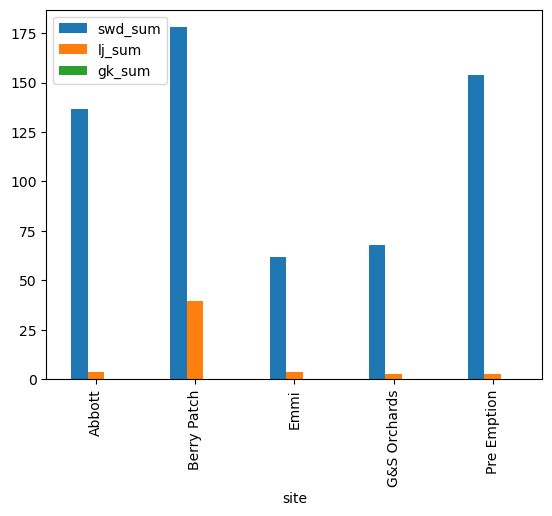

In [522]:
swd_ny.groupby(by = "site")[['swd_sum', 'lj_sum', 'gk_sum']].mean().plot(kind = "bar")


<Axes: xlabel='swd_sum', ylabel='lj_sum'>

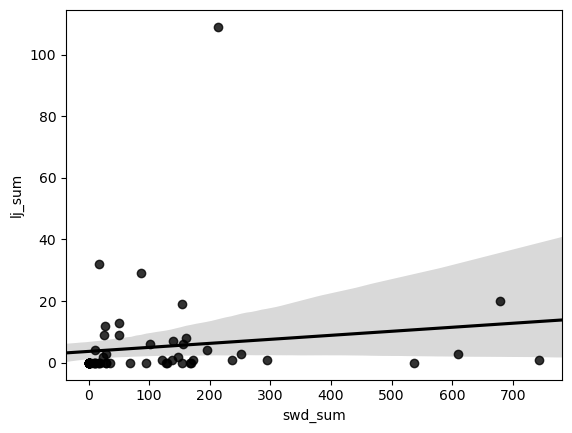

In [523]:
sns.regplot(
    data=swd_ny, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
stats.pearsonr(swd_ny['swd_sum'], swd_ny['lj_sum'])

In [ ]:
sns.regplot(
    data=swd_ny, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
stats.pearsonr(swd_ny['forest_prop'], swd_ny['lj_sum'])

# New Jersey

In [524]:
swd_nj = pd.read_csv('Data/swd_nj.csv')
swd_nj = clean_columns(swd_nj)
swd_nj["collection_date"] = pd.to_datetime(swd_nj["collection_date"], format='mixed')

swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,sample_type,host_plant,n_of_subsample_if_any,sample_weight_gr,swd_pupae,swd,l_japonica,g_kimorum,other_parasitoids,other_drosophilid_pupae,other_drosophilid,l_japonica_1,other_parasitoids_1,notes_if_any
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit Collection,Highbush Blueberry,NaN,6.8,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit Collection,Highbush Blueberry,NaN,21.9,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit Collection,Highbush Blueberry,NaN,7.9,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit Collection,Highbush Blueberry,NaN,5.8,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit Collection,Highbush Blueberry,NaN,7.0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2024-06-04,USA,Fred Miller,New Jersey,"39°47'40.0""N","74°47'05.2""W",Sentinel,Blueberry,NaN,NaN,NaN,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,2024-06-04,USA,Macrie - Home,New Jersey,"39°34'56.88""N","74°46'31.70""W",Sentinel,Blueberry,NaN,NaN,NaN,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,2024-06-04,USA,ABC - Home,New Jersey,"39°33'32.78""N","74°46'39.98""W",Sentinel,Blueberry,NaN,NaN,NaN,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,2024-06-04,USA,Stoney Creek,New Jersey,"39°37'01.6""N","74°50'29.6""W",Sentinel,Blueberry,NaN,NaN,NaN,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [525]:
swd_nj.loc[swd_nj['farm'].str.contains('mays', case=False), 'farm'] = 'ABC Mays Landing'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*abc)(?=.*home)', case=False), 'farm'] = 'ABC Home'
swd_nj.loc[swd_nj['farm'].str.contains('miller', case=False), 'farm'] = 'Miller Farms'
swd_nj.loc[swd_nj['farm'].str.contains('haines', case=False), 'farm'] = 'Haines Berry Farm'
swd_nj.loc[swd_nj['farm'].str.contains('buck', case=False), 'farm'] = 'Big Buck Farms'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*macrie)(?=.*20)', case=False), 'farm'] = 'Macrie 206'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*macrie)(?=.*home)', case=False), 'farm'] = 'Macrie Brothers'
swd_nj.loc[swd_nj['farm'].str.contains('moore', case=False), 'farm'] = 'Moore Farms'
swd_nj.loc[swd_nj['farm'].str.contains('pastore', case=False), 'farm'] = 'Pastore Orchards'
swd_nj.loc[swd_nj['farm'].str.contains('donkey', case=False), 'farm'] = 'Variety Farms Inc'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*variety)(?=.*nesco)', case=False), 'farm'] = 'Variety Farms Nesco'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*whalen)(?=.*cw)', case=False), 'farm'] = 'Whalens Chatsworth'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*whalen)(?=.*chatsworth)', case=False), 'farm'] = 'Whalens Chatsworth'
swd_nj.loc[swd_nj['farm'].str.contains(r'^(?=.*whalen)(?=.*home)', case=False), 'farm'] = 'Whalens Home'

In [526]:
nj_sites = {"Variety Farms Inc":"J1", 
            "Moore Farms":"J2",
            "Big Buck Farms":"J3",
            "Denny Doyle":"J4",
            "Macrie Brothers":"J5",
            "ABC Home":"J6", 
            "ABC Mays Landing":"J7",
            "Haines Berry Farm":"J8",
            "Miller Farms":"J9",
            "Whalens Chatsworth":"J10",
            "Pastore Orchards":"J11", 
            "Stoney Creek":"J12",
            "Variety Farms Nesco":"J13",
            "Macrie 206":"J14",
            "Whalens Home":"J15"}

In [527]:
swd_nj['site_code'] = swd_nj['farm'].map(nj_sites).fillna('')
swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,sample_type,host_plant,n_of_subsample_if_any,sample_weight_gr,...,swd,l_japonica,g_kimorum,other_parasitoids,other_drosophilid_pupae,other_drosophilid,l_japonica_1,other_parasitoids_1,notes_if_any,site_code
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit Collection,Highbush Blueberry,NaN,6.8,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,J4
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit Collection,Highbush Blueberry,NaN,21.9,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,J4
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit Collection,Highbush Blueberry,NaN,7.9,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,J4
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit Collection,Highbush Blueberry,NaN,5.8,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,J8
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit Collection,Highbush Blueberry,NaN,7.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,J8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2024-06-04,USA,Miller Farms,New Jersey,"39°47'40.0""N","74°47'05.2""W",Sentinel,Blueberry,NaN,NaN,...,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J9
638,2024-06-04,USA,Macrie Brothers,New Jersey,"39°34'56.88""N","74°46'31.70""W",Sentinel,Blueberry,NaN,NaN,...,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J5
639,2024-06-04,USA,ABC Home,New Jersey,"39°33'32.78""N","74°46'39.98""W",Sentinel,Blueberry,NaN,NaN,...,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J6
640,2024-06-04,USA,Stoney Creek,New Jersey,"39°37'01.6""N","74°50'29.6""W",Sentinel,Blueberry,NaN,NaN,...,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J12


In [528]:
cdl_nj = pd.read_csv('Landscape/CDL/2023_nj_cdl_1500m.csv')
cdl_nj = clean_columns(cdl_nj)
cdl_nj

,unnamed_0,name,corn,sorghum,soybeans,sunflower,sweet_corn,pop_or_orn_corn,winter_wheat,dbl_crop_win_wht_soybeans,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,0,J1,42,3,21,0,0,65,0,0,...,0.432621,29,0.002204,1206,0.091662,24,0.001824,0.162803,0.434826,1500
1,1,J2,40,5,242,0,0,0,0,7,...,0.835147,75,0.005669,434,0.032804,758,0.057294,0.294709,0.840816,1500
2,2,J3,156,1,16,0,0,50,0,0,...,0.705717,40,0.003037,1002,0.076076,9,0.000683,0.184420,0.708754,1500
3,3,J4,22,4,164,0,3,0,0,5,...,0.854065,94,0.007082,723,0.054471,20,0.001507,0.184585,0.861147,1500
4,4,J5,107,0,109,0,0,0,6,2,...,0.725204,83,0.006318,1275,0.097054,13,0.000990,0.206744,0.731522,1500
5,5,J6,346,6,290,2,0,10,11,11,...,0.663163,106,0.008074,969,0.073812,22,0.001676,0.189976,0.671237,1500
6,6,J7,192,7,226,0,2,0,4,10,...,0.770364,219,0.016719,1350,0.103061,827,0.063135,0.239179,0.787083,1500
7,7,J8,24,6,190,0,11,0,0,0,...,0.789815,99,0.007458,559,0.042112,491,0.036990,0.095600,0.797273,1500
8,8,J9,201,15,437,0,7,0,9,5,...,0.763447,137,0.010364,1304,0.098646,27,0.002043,0.465996,0.773810,1500
9,9,J10,11,0,35,0,5,0,0,0,...,0.769742,160,0.012091,551,0.041638,52,0.003930,0.432253,0.781833,1500


In [529]:
swd_nj = pd.merge(swd_nj, cdl_nj, how='left', left_on='site_code', right_on='name')
swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,sample_type,host_plant,n_of_subsample_if_any,sample_weight_gr,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit Collection,Highbush Blueberry,NaN,6.8,...,0.854065,94,0.007082,723,0.054471,20,0.001507,0.184585,0.861147,1500
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit Collection,Highbush Blueberry,NaN,21.9,...,0.854065,94,0.007082,723,0.054471,20,0.001507,0.184585,0.861147,1500
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit Collection,Highbush Blueberry,NaN,7.9,...,0.854065,94,0.007082,723,0.054471,20,0.001507,0.184585,0.861147,1500
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit Collection,Highbush Blueberry,NaN,5.8,...,0.789815,99,0.007458,559,0.042112,491,0.036990,0.095600,0.797273,1500
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit Collection,Highbush Blueberry,NaN,7.0,...,0.789815,99,0.007458,559,0.042112,491,0.036990,0.095600,0.797273,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2024-06-04,USA,Miller Farms,New Jersey,"39°47'40.0""N","74°47'05.2""W",Sentinel,Blueberry,NaN,NaN,...,0.763447,137,0.010364,1304,0.098646,27,0.002043,0.465996,0.773810,1500
638,2024-06-04,USA,Macrie Brothers,New Jersey,"39°34'56.88""N","74°46'31.70""W",Sentinel,Blueberry,NaN,NaN,...,0.725204,83,0.006318,1275,0.097054,13,0.000990,0.206744,0.731522,1500
639,2024-06-04,USA,ABC Home,New Jersey,"39°33'32.78""N","74°46'39.98""W",Sentinel,Blueberry,NaN,NaN,...,0.663163,106,0.008074,969,0.073812,22,0.001676,0.189976,0.671237,1500
640,2024-06-04,USA,Stoney Creek,New Jersey,"39°37'01.6""N","74°50'29.6""W",Sentinel,Blueberry,NaN,NaN,...,0.448229,130,0.009883,2684,0.204044,123,0.009351,0.161244,0.458112,1500


In [530]:
swd_nj['swd_sum'] = swd_nj['swd']
swd_nj['lj_sum'] = swd_nj['l_japonica'] 
swd_nj['gk_sum'] = swd_nj['g_kimorum']
#swd_nj = swd_nj.dropna(subset = ['swd_sum', 'lj_sum', 'gk_sum', 'forest_prop'])
swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,sample_type,host_plant,n_of_subsample_if_any,sample_weight_gr,...,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit Collection,Highbush Blueberry,NaN,6.8,...,723,0.054471,20,0.001507,0.184585,0.861147,1500,0,0,0.0
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit Collection,Highbush Blueberry,NaN,21.9,...,723,0.054471,20,0.001507,0.184585,0.861147,1500,0,0,0.0
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit Collection,Highbush Blueberry,NaN,7.9,...,723,0.054471,20,0.001507,0.184585,0.861147,1500,0,0,0.0
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit Collection,Highbush Blueberry,NaN,5.8,...,559,0.042112,491,0.036990,0.095600,0.797273,1500,0,0,0.0
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit Collection,Highbush Blueberry,NaN,7.0,...,559,0.042112,491,0.036990,0.095600,0.797273,1500,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2024-06-04,USA,Miller Farms,New Jersey,"39°47'40.0""N","74°47'05.2""W",Sentinel,Blueberry,NaN,NaN,...,1304,0.098646,27,0.002043,0.465996,0.773810,1500,22,0,NaN
638,2024-06-04,USA,Macrie Brothers,New Jersey,"39°34'56.88""N","74°46'31.70""W",Sentinel,Blueberry,NaN,NaN,...,1275,0.097054,13,0.000990,0.206744,0.731522,1500,41,0,NaN
639,2024-06-04,USA,ABC Home,New Jersey,"39°33'32.78""N","74°46'39.98""W",Sentinel,Blueberry,NaN,NaN,...,969,0.073812,22,0.001676,0.189976,0.671237,1500,40,0,NaN
640,2024-06-04,USA,Stoney Creek,New Jersey,"39°37'01.6""N","74°50'29.6""W",Sentinel,Blueberry,NaN,NaN,...,2684,0.204044,123,0.009351,0.161244,0.458112,1500,28,0,NaN


<Axes: xlabel='farm'>

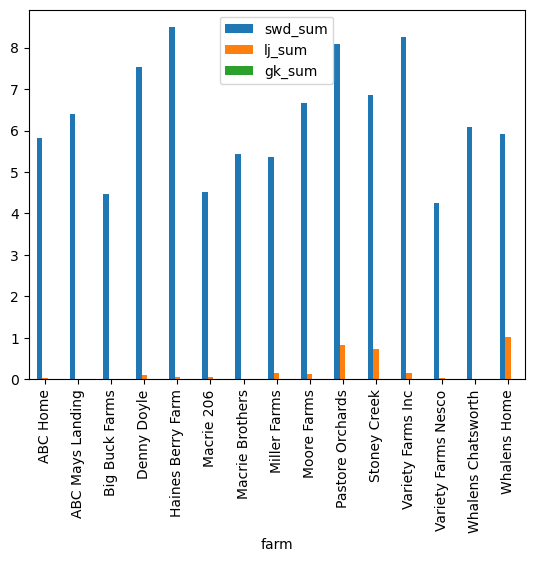

In [531]:
swd_nj.groupby(by = "farm")[['swd_sum', 'lj_sum', 'gk_sum']].mean().plot(kind = "bar")


In [ ]:
sns.regplot(
    data=swd_nj, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
swd_nj_dropped = swd_nj.dropna(subset = ['swd_sum', 'lj_sum'])
stats.pearsonr(swd_nj_dropped['swd_sum'], swd_nj_dropped['lj_sum'])

In [ ]:
sns.regplot(
    data=swd_nj, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
swd_nj_dropped = swd_nj.dropna(subset = ['forest_prop', 'lj_sum'])
stats.pearsonr(swd_nj_dropped['forest_prop'], swd_nj_dropped['lj_sum'])

# Maine

In [532]:
swd_me = pd.read_csv('Data/swd_me.csv')
swd_me = clean_columns(swd_me)
swd_me["collection_date"] = pd.to_datetime(swd_me["collection_date"], format='mixed')

swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,leptopilina_japonica_present,total_leptopilina_japonica_in_the_sample,habitat_fruit_where_gb_or_lj_detected_ie_wooded_riparian,further_details_e_g_gb_found_100_m_from_release_or_describe_sentinel_trap_mass_fruit_collected_g,timing_of_when_sample_was_taken,type_of_fruit_s_collected_or_used_in_sentinel,other_species_present_e_g_4_asobara
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,Yes,7,Field edge,14.7,Pre-release,Wild Raspberry,No
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,No,0,Field edge,31,Pre-release,Lowbush Blueberry,No
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,1m into field,94.6,Pre-release,Lowbush Blueberry,No
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,10m into field,95.1,Pre-release,Lowbush Blueberry,1 R. mendax parasitoid
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,25m into field,93.3,Pre-release,Lowbush Blueberry,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,No,0,Field edge,23.6g fruit,Post-release,Bunchberry,No
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,No,0,Field edge,13.6g fruit,Pre-release,Bunchberry,No
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No


In [533]:
me_sites = {"ME_2022_1":"M1", 
            "ME_2022_2":"M2",
            "ME_2022_3":"M3",
            "ME_2022_4":"M4",
            "ME_2023_2":"M5",
            "ME_2023_4":"M6", 
            "ME_2023_5":"M7",
            "TT":"M8",
            "L&F":"M9",
            "FF":"M10",
            "CN":"M11", 
            "TTDL":"M12",
            "RHDL":"M13",
            "RHT":"M14",
            "TTDL":"M15",
            "LHFB":"M16", 
            "RHDL":"M17",
            "RH":"M18",
            "RH":"M19",
            "TTDL":"M20",
            "FFDL":"M21",
            "Goss":"M22",
            "Fairwinds":"M23",
            "ME_2023_1":"M1",
            "ME_2023_3":"M4",
            "CHH":"M1",
            "INT":"M4",
            "GUSH":"M6", 
            "GUR":"M5", 
            "SENN":"M7"}

In [534]:
swd_me['site_code'] = swd_me['site_name_e_g_farm_or_how_you_identify_this_site'].map(me_sites).fillna('')
swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,leptopilina_japonica_present,total_leptopilina_japonica_in_the_sample,habitat_fruit_where_gb_or_lj_detected_ie_wooded_riparian,further_details_e_g_gb_found_100_m_from_release_or_describe_sentinel_trap_mass_fruit_collected_g,timing_of_when_sample_was_taken,type_of_fruit_s_collected_or_used_in_sentinel,other_species_present_e_g_4_asobara,site_code
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,Yes,7,Field edge,14.7,Pre-release,Wild Raspberry,No,M9
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,No,0,Field edge,31,Pre-release,Lowbush Blueberry,No,M9
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,1m into field,94.6,Pre-release,Lowbush Blueberry,No,M9
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,10m into field,95.1,Pre-release,Lowbush Blueberry,1 R. mendax parasitoid,M9
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,25m into field,93.3,Pre-release,Lowbush Blueberry,No,M9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,No,0,Field edge,23.6g fruit,Post-release,Bunchberry,No,M4
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,No,0,Field edge,13.6g fruit,Pre-release,Bunchberry,No,M4
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No,M4
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No,M4


In [535]:
cdl_me = pd.read_csv('Landscape/CDL/2023_me_cdl_1500m.csv')
cdl_me = clean_columns(cdl_me)
cdl_me

,unnamed_0,name,value_0,corn,oats,alfalfa,other_hay_non_alfalfa,dry_beans,potatoes,fallow_idle_cropland,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,0,M1,0,6,0,2,191,0,4,9,...,0.697155,347,0.022850,526,0.034637,604,0.039773,0.666074,0.720005,1500
1,1,M2,1924,4,0,0,75,0,0,4,...,0.723207,470,0.030639,1436,0.093611,131,0.008540,0.657432,0.753846,1500
2,2,M3,0,1,0,3,198,0,4,0,...,0.858720,137,0.008895,1043,0.067718,220,0.014284,0.821192,0.867615,1500
3,3,M4,0,0,0,0,23,0,0,4,...,0.902499,75,0.004869,730,0.047387,19,0.001233,0.803311,0.907368,1500
4,4,M5,0,6,0,2,386,0,0,4,...,0.737015,541,0.035569,973,0.063971,409,0.026890,0.713938,0.772584,1500
5,5,M6,0,25,0,2,920,0,0,4,...,0.575983,1069,0.070264,1045,0.068687,2959,0.194492,0.449652,0.646247,1500
6,6,M7,0,13,0,2,882,0,0,2,...,0.764192,1172,0.077004,1072,0.070434,50,0.003285,0.646846,0.841196,1500
7,7,M8,0,4,0,0,451,0,0,18,...,0.857593,395,0.025958,872,0.057304,7,0.000460,0.848919,0.883551,1500
8,8,M9,0,5,0,0,236,0,0,2,...,0.883663,388,0.025633,798,0.052719,284,0.018762,0.796657,0.909295,1500
9,9,M10,0,4,0,0,460,0,0,2,...,0.833520,1130,0.074622,629,0.041537,145,0.009575,0.782144,0.908142,1500


In [536]:
swd_me = pd.merge(swd_me, cdl_me, how='left', left_on='site_code', right_on='name')
swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,...,0.883663,388.0,0.025633,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,...,0.883663,388.0,0.025633,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,0.883663,388.0,0.025633,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,0.883663,388.0,0.025633,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,0.883663,388.0,0.025633,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,...,0.902499,75.0,0.004869,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,...,0.902499,75.0,0.004869,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,...,0.902499,75.0,0.004869,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,...,0.902499,75.0,0.004869,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0


In [537]:
swd_me['swd_sum'] = swd_me['hosts']
swd_me[['swd_sum']] = swd_me[['swd_sum']].apply(pd.to_numeric, errors='coerce')
swd_me['lj_sum'] = swd_me['total_leptopilina_japonica_in_the_sample'] 
swd_me['gk_sum'] = swd_me['total_ganaspis_kimorum_in_the_sample']
#swd_me = swd_me.dropna(subset = ['swd_sum', 'lj_sum','forest_prop'])
swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,...,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,...,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,25.0,7,0
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,...,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,4.0,0,0
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0.0,0,0
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0.0,0,0
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,798.0,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,...,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,NaN,0,0
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,...,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,NaN,0,0
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,...,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,NaN,0,0
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,...,730.0,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,NaN,0,0


<Axes: xlabel='site_name_e_g_farm_or_how_you_identify_this_site'>

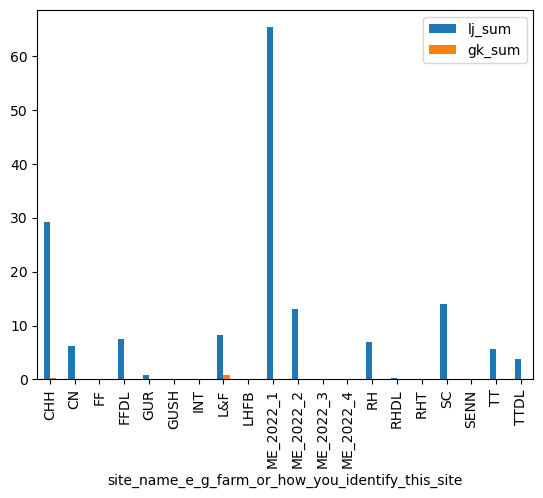

In [538]:
swd_me.groupby(by = "site_name_e_g_farm_or_how_you_identify_this_site")[['lj_sum', 'gk_sum']].mean().plot(kind = "bar")


In [ ]:
sns.regplot(
    data=swd_me, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black")

In [ ]:
swd_me_dropped = swd_me.dropna(subset = ['swd_sum', 'lj_sum'])
stats.pearsonr(swd_me_dropped['swd_sum'], swd_me_dropped['lj_sum'])

<Axes: xlabel='forest_prop', ylabel='lj_sum'>

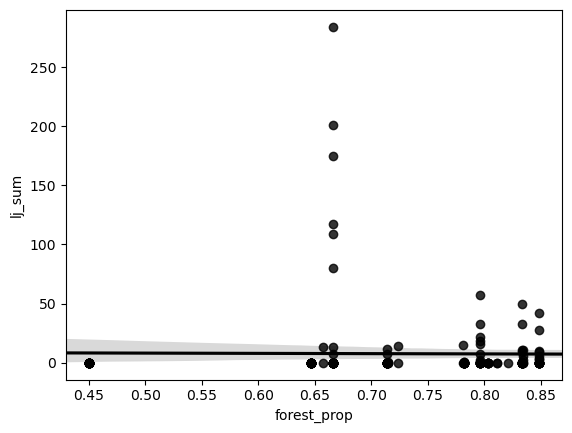

In [539]:
sns.regplot(
    data=swd_me, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [540]:
swd_me_dropped = swd_me.dropna(subset = ['forest_prop', 'lj_sum'])
stats.pearsonr(swd_me_dropped['forest_prop'], swd_me_dropped['lj_sum'])

PearsonRResult(statistic=-0.008347663066631279, pvalue=0.9099659911752218)

# Combined

In [541]:
swd_me_subset = swd_me[['site_name_e_g_farm_or_how_you_identify_this_site', 'collection_date', 'type_of_fruit_s_collected_or_used_in_sentinel', 
                        'name', 'ag', 'ag_prop', 'nat', 'nat_prop', 'semi_nat',
                        'semi_nat_prop', 'dev', 'dev_prop', 'other', 'other_prop',
                        'forest_prop', 'total_nat_prop', 'buffer', 'lj_sum', 'gk_sum', 'swd_sum', 'sample_type']]

swd_me_subset = swd_me_subset.rename(columns={"site_name_e_g_farm_or_how_you_identify_this_site": "farm", "type_of_fruit_s_collected_or_used_in_sentinel": "host_plant"})

swd_me_subset

,farm,collection_date,host_plant,name,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,...,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,lj_sum,gk_sum,swd_sum,sample_type
0,L&F,2024-07-09,Wild Raspberry,M9,54.0,0.003567,13376.0,0.883663,388.0,0.025633,...,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,7,0,25.0,Fruit Collection
1,L&F,2024-07-16,Lowbush Blueberry,M9,54.0,0.003567,13376.0,0.883663,388.0,0.025633,...,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0,0,4.0,Fruit Collection
2,L&F,2024-07-16,Lowbush Blueberry,M9,54.0,0.003567,13376.0,0.883663,388.0,0.025633,...,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0,0,0.0,Fruit Collection
3,L&F,2024-07-16,Lowbush Blueberry,M9,54.0,0.003567,13376.0,0.883663,388.0,0.025633,...,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0,0,0.0,Fruit Collection
4,L&F,2024-07-16,Lowbush Blueberry,M9,54.0,0.003567,13376.0,0.883663,388.0,0.025633,...,0.052719,284.0,0.018762,0.796657,0.909295,1500.0,0,0,0.0,Fruit Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,INT,2023-08-11,Bunchberry,M4,656.0,0.042584,13903.0,0.902499,75.0,0.004869,...,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,0,0,NaN,Fruit Collection
183,INT,2023-07-26,Bunchberry,M4,656.0,0.042584,13903.0,0.902499,75.0,0.004869,...,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,0,0,NaN,Fruit Collection
184,INT,2023-07-26,Blueberry,M4,656.0,0.042584,13903.0,0.902499,75.0,0.004869,...,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,0,0,NaN,Sentinel
185,INT,2023-08-23,Blueberry,M4,656.0,0.042584,13903.0,0.902499,75.0,0.004869,...,0.047387,19.0,0.001233,0.803311,0.907368,1500.0,0,0,NaN,Sentinel


In [542]:
swd_nj_subset = swd_nj[['collection_date', 'farm', 'name', 'host_plant', 'ag', 'ag_prop', 'nat',
       'nat_prop', 'semi_nat', 'semi_nat_prop', 'dev', 'dev_prop', 'other',
       'other_prop', 'forest_prop', 'total_nat_prop', 'buffer', 'swd_sum',
       'lj_sum', 'gk_sum', 'sample_type']]

swd_nj_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,...,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum,sample_type
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129,0.085060,11336,0.854065,94,0.007082,...,0.054471,20,0.001507,0.184585,0.861147,1500,0,0,0.0,Fruit Collection
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129,0.085060,11336,0.854065,94,0.007082,...,0.054471,20,0.001507,0.184585,0.861147,1500,0,0,0.0,Fruit Collection
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129,0.085060,11336,0.854065,94,0.007082,...,0.054471,20,0.001507,0.184585,0.861147,1500,0,0,0.0,Fruit Collection
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659,0.124981,10484,0.789815,99,0.007458,...,0.042112,491,0.036990,0.095600,0.797273,1500,0,0,0.0,Fruit Collection
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659,0.124981,10484,0.789815,99,0.007458,...,0.042112,491,0.036990,0.095600,0.797273,1500,0,0,0.0,Fruit Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2024-06-04,Miller Farms,J9,Blueberry,1519,0.114910,10092,0.763447,137,0.010364,...,0.098646,27,0.002043,0.465996,0.773810,1500,22,0,NaN,Sentinel
638,2024-06-04,Macrie Brothers,J5,Blueberry,2542,0.193499,9527,0.725204,83,0.006318,...,0.097054,13,0.000990,0.206744,0.731522,1500,41,0,NaN,Sentinel
639,2024-06-04,ABC Home,J6,Blueberry,3865,0.294409,8706,0.663163,106,0.008074,...,0.073812,22,0.001676,0.189976,0.671237,1500,40,0,NaN,Sentinel
640,2024-06-04,Stoney Creek,J12,Blueberry,4301,0.326973,5896,0.448229,130,0.009883,...,0.204044,123,0.009351,0.161244,0.458112,1500,28,0,NaN,Sentinel


In [543]:
swd_ny_subset = swd_ny[['collection_date', 'site', 'name', 'fruit', 'ag', 'ag_prop', 'nat',
       'nat_prop', 'semi_nat', 'semi_nat_prop', 'dev', 'dev_prop', 'other',
       'other_prop', 'forest_prop', 'total_nat_prop', 'buffer', 'swd_sum',
       'lj_sum', 'gk_sum', 'sample_type']]

swd_ny_subset = swd_ny_subset.rename(columns={"site": "farm", "fruit": "host_plant"})

swd_ny_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,...,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum,sample_type
0,2024-09-04,Emmi,Y3,Autum Olive,3345,0.227985,4915,0.334992,2131,0.145243,...,0.130180,2152,0.146674,0.242026,0.480234,1500,1.0,0,0,Fruit Collection
1,2024-06-26,Abbott,Y2,Blueberry,3233,0.220622,4049,0.276307,2852,0.194623,...,0.246963,710,0.048451,0.127610,0.470929,1500,0.0,0,0,Fruit Collection
2,2024-07-25,Abbott,Y2,Blueberry,3233,0.220622,4049,0.276307,2852,0.194623,...,0.246963,710,0.048451,0.127610,0.470929,1500,154.0,0,0,Fruit Collection
3,2024-06-26,Emmi,Y3,Blueberry,3345,0.227985,4915,0.334992,2131,0.145243,...,0.130180,2152,0.146674,0.242026,0.480234,1500,0.0,0,0,Fruit Collection
4,2024-07-25,Emmi,Y3,Blueberry,3345,0.227985,4915,0.334992,2131,0.145243,...,0.130180,2152,0.146674,0.242026,0.480234,1500,127.0,0,0,Fruit Collection
5,2024-06-26,G&S Orchards,Y4,Blueberry,2929,0.199646,6036,0.411424,3771,0.257038,...,0.161407,29,0.001977,0.208984,0.668462,1500,0.0,0,0,Fruit Collection
6,2024-07-25,G&S Orchards,Y4,Blueberry,2929,0.199646,6036,0.411424,3771,0.257038,...,0.161407,29,0.001977,0.208984,0.668462,1500,0.0,0,0,Fruit Collection
7,2024-06-26,Pre Emption,Y1,Blueberry,11867,0.818753,1301,0.089761,585,0.040362,...,0.043742,0,0.000000,0.077342,0.130123,1500,3.0,0,0,Fruit Collection
8,2024-07-25,Pre Emption,Y1,Blueberry,11867,0.818753,1301,0.089761,585,0.040362,...,0.043742,0,0.000000,0.077342,0.130123,1500,744.0,1,0,Fruit Collection
9,2024-09-04,Abbott,Y2,Buckthorn,3233,0.220622,4049,0.276307,2852,0.194623,...,0.246963,710,0.048451,0.127610,0.470929,1500,29.0,3,2,Fruit Collection


In [544]:
combined_subset = pd.concat([swd_nj_subset, swd_me_subset, swd_ny_subset], axis=0)
combined_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,...,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum,sample_type
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.054471,20.0,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.054471,20.0,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.054471,20.0,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659.0,0.124981,10484.0,0.789815,99.0,0.007458,...,0.042112,491.0,0.036990,0.095600,0.797273,1500.0,0.0,0,0.0,Fruit Collection
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659.0,0.124981,10484.0,0.789815,99.0,0.007458,...,0.042112,491.0,0.036990,0.095600,0.797273,1500.0,0.0,0,0.0,Fruit Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-09-20,Pre Emption,Y1,Sentinel,11867.0,0.818753,1301.0,0.089761,585.0,0.040362,...,0.043742,0.0,0.000000,0.077342,0.130123,1500.0,101.0,6,0.0,Sentinel
57,2022-09-20,Abbott,Y2,Sentinel,3233.0,0.220622,4049.0,0.276307,2852.0,0.194623,...,0.246963,710.0,0.048451,0.127610,0.470929,1500.0,51.0,9,0.0,Sentinel
58,2022-09-20,Emmi,Y3,Sentinel,3345.0,0.227985,4915.0,0.334992,2131.0,0.145243,...,0.130180,2152.0,0.146674,0.242026,0.480234,1500.0,51.0,13,0.0,Sentinel
59,2022-09-20,G&S Orchards,Y4,Sentinel,2929.0,0.199646,6036.0,0.411424,3771.0,0.257038,...,0.161407,29.0,0.001977,0.208984,0.668462,1500.0,18.0,32,0.0,Sentinel


<Axes: xlabel='swd_sum', ylabel='lj_sum'>

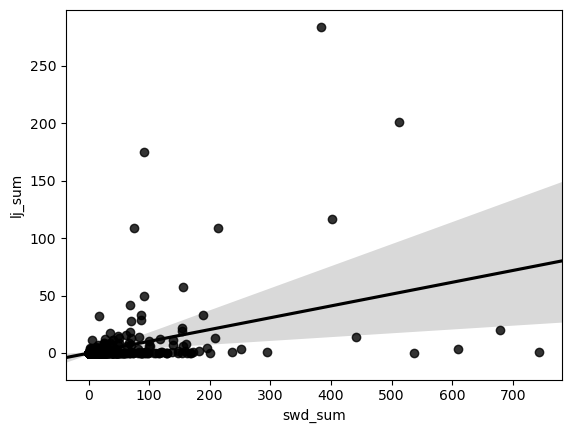

In [545]:
sns.regplot(
    data=combined_subset, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [546]:
combined_subset_dropped = combined_subset.dropna(subset = ['swd_sum', 'lj_sum'])
stats.pearsonr(combined_subset_dropped['swd_sum'], combined_subset_dropped['lj_sum'])

PearsonRResult(statistic=0.4234246450914343, pvalue=1.3511902649775425e-39)

In [ ]:
sns.regplot(
    data=combined_subset, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
combined_subset_dropped = combined_subset.dropna(subset = ['forest_prop', 'lj_sum'])
stats.pearsonr(combined_subset_dropped['forest_prop'], combined_subset_dropped['lj_sum'])

In [ ]:
sns.regplot(
    data=combined_subset, x="ag_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
stats.pearsonr(combined_subset['ag_prop'], combined_subset['lj_sum'])

In [ ]:
sns.regplot(
    data=combined_subset, x="nat_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
stats.pearsonr(combined_subset['nat_prop'], combined_subset['lj_sum'])

In [ ]:
sns.regplot(
    data=combined_subset, x="nat_prop", y="forest_prop",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
sns.regplot(
    data=combined_subset, x="ag_prop", y="forest_prop",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
combined_subset_dropped = combined_subset.dropna(subset = ['nat_prop', 'ag_prop'])

stats.pearsonr(combined_subset_dropped['nat_prop'], combined_subset_dropped['ag_prop'])

In [547]:
combined_subset['presence_lj'] = (combined_subset[['lj_sum']] > 0).any(axis=1).astype(int)
combined_subset['presence_gk'] = (combined_subset[['gk_sum']] > 0).any(axis=1).astype(int)

In [548]:
combined_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,...,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum,sample_type,presence_lj,presence_gk
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection,0,0
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection,0,0
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection,0,0
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659.0,0.124981,10484.0,0.789815,99.0,0.007458,...,0.036990,0.095600,0.797273,1500.0,0.0,0,0.0,Fruit Collection,0,0
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659.0,0.124981,10484.0,0.789815,99.0,0.007458,...,0.036990,0.095600,0.797273,1500.0,0.0,0,0.0,Fruit Collection,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-09-20,Pre Emption,Y1,Sentinel,11867.0,0.818753,1301.0,0.089761,585.0,0.040362,...,0.000000,0.077342,0.130123,1500.0,101.0,6,0.0,Sentinel,1,0
57,2022-09-20,Abbott,Y2,Sentinel,3233.0,0.220622,4049.0,0.276307,2852.0,0.194623,...,0.048451,0.127610,0.470929,1500.0,51.0,9,0.0,Sentinel,1,0
58,2022-09-20,Emmi,Y3,Sentinel,3345.0,0.227985,4915.0,0.334992,2131.0,0.145243,...,0.146674,0.242026,0.480234,1500.0,51.0,13,0.0,Sentinel,1,0
59,2022-09-20,G&S Orchards,Y4,Sentinel,2929.0,0.199646,6036.0,0.411424,3771.0,0.257038,...,0.001977,0.208984,0.668462,1500.0,18.0,32,0.0,Sentinel,1,0


In [549]:
subset_2024 = combined_subset[combined_subset['collection_date'].dt.year == 2024]
subset_2024

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,...,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum,sample_type,presence_lj,presence_gk
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection,0,0
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection,0,0
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,1129.0,0.085060,11336.0,0.854065,94.0,0.007082,...,0.001507,0.184585,0.861147,1500.0,0.0,0,0.0,Fruit Collection,0,0
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659.0,0.124981,10484.0,0.789815,99.0,0.007458,...,0.036990,0.095600,0.797273,1500.0,0.0,0,0.0,Fruit Collection,0,0
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,1659.0,0.124981,10484.0,0.789815,99.0,0.007458,...,0.036990,0.095600,0.797273,1500.0,0.0,0,0.0,Fruit Collection,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,2024-06-26,Pre Emption,Y1,Honeysuckle,11867.0,0.818753,1301.0,0.089761,585.0,0.040362,...,0.000000,0.077342,0.130123,1500.0,8.0,0,0.0,Fruit Collection,0,0
38,2024-09-04,Emmi,Y3,Pokeweed,3345.0,0.227985,4915.0,0.334992,2131.0,0.145243,...,0.146674,0.242026,0.480234,1500.0,10.0,0,0.0,Fruit Collection,0,0
39,2024-09-04,G&S Orchards,Y4,Pokeweed,2929.0,0.199646,6036.0,0.411424,3771.0,0.257038,...,0.001977,0.208984,0.668462,1500.0,0.0,0,0.0,Fruit Collection,0,0
40,2024-09-04,Pre Emption,Y1,Pokeweed,11867.0,0.818753,1301.0,0.089761,585.0,0.040362,...,0.000000,0.077342,0.130123,1500.0,16.0,0,0.0,Fruit Collection,0,0


<Axes: xlabel='forest_prop', ylabel='lj_sum'>

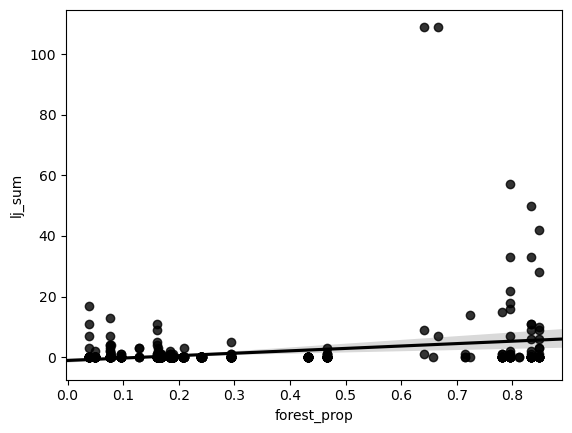

In [550]:
sns.regplot(
    data=subset_2024, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [552]:
combined_subset_dropped = subset_2024.dropna(subset = ['forest_prop', 'lj_sum'])

stats.pearsonr(combined_subset_dropped['forest_prop'], combined_subset_dropped['lj_sum'])

PearsonRResult(statistic=0.2533075666324152, pvalue=1.7879110378232004e-12)

<Axes: xlabel='forest_prop', ylabel='gk_sum'>

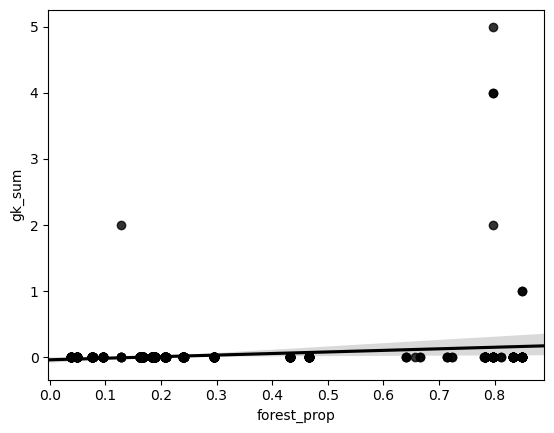

In [553]:
sns.regplot(
    data=subset_2024, x="forest_prop", y="gk_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [557]:
combined_subset_dropped = subset_2024.dropna(subset = ['forest_prop', 'gk_sum'])

stats.pearsonr(combined_subset_dropped['forest_prop'], combined_subset_dropped['gk_sum'])

PearsonRResult(statistic=0.1770774117820517, pvalue=1.315682605934989e-06)

In [ ]:
sns.regplot(
    data=subset_2024, x="ag_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [ ]:
stats.pearsonr(subset_2024['ag_prop'], subset_2024['lj_sum'])

In [ ]:
sns.regplot(
    data=combined_subset, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [558]:
subset_2024_temp = subset_2024.dropna(subset = ['swd_sum', 'lj_sum', 'gk_sum', 'forest_prop'])
stats.pearsonr(subset_2024_temp['swd_sum'], subset_2024_temp['lj_sum'])

PearsonRResult(statistic=0.2934891958262149, pvalue=4.1591761495068495e-16)

In [559]:
combined_subset.to_csv('Data/presence_absence.csv')

In [563]:
host_plants = pd.read_csv('Data/swd_host_plants.csv')
host_plants

,host_plant,family,blueberry_family
0,American Holly,Aquifoliaceae,No
1,Autum Olive,Elaeagnaceae,No
2,Autumn olive,Elaeagnaceae,No
3,Bayberry,Myricaceae,No
4,Black Cherry,Rosaceae,No
5,Black Gum,Cornaceae,No
6,Blackberry,Rosaceae,No
7,Blueberry,Ericaceae,Yes
8,Blueberry and Banana,NaN,NaN
9,Buckthorn,Rhamnaceae,No


In [564]:
combined_subset = combined_subset.merge(host_plants, on='host_plant')
combined_subset.to_csv('Data/presence_absence.csv')

In [565]:
subset_2024 = subset_2024.merge(host_plants, on='host_plant')
subset_2024.to_csv('Data/subset_2024.csv')